# Sensor space analysis: Time domain analysis (ERP/ERF) in MNE-Python

`
Authors:
Marijn van Vliet, Britta Westner, Alexandre Gramfort, Denis A. Engemann
`

## Setup

We already know this part from last time:
 

In [1]:
# This makes figures appear inside the notebook instead of in a new window.
%matplotlib inline

# These are the Python packages we will use in this notebook.
import numpy as np  # for numerical computations
import matplotlib.pyplot as plt  # for making custom figures
import mne  # for MEG and EEG data analysis

mne.set_log_level('warning')

## Set the path to the data and load the previously saved epochs

You should have downloaded the `ds000117-practical` folder. We have to let Python know, where to find this folder on your disk. You will have to adjust the path below to reflect your computer and path structure!
You can print the whole path and check the directory to double check it's correct.

In [3]:
# Change the following path to where the folder ds000117 is on your disk.
data_path = "./ds000117_pruned"  # `./` means the folder of this notebook

# Based on the `data_path` you specified above, and assuming you have completed the previous notebook,
# this is where the raw MEG+EEG data should be.
epochs_fname = f"{data_path}/derivatives/meg_derivatives/sub-01/ses-meg/meg/sub-01_ses-meg_task-facerecognition_run-01_proc-sss-epo.fif"
print(epochs_fname)

./ds000117_pruned/derivatives/meg_derivatives/sub-01/ses-meg/meg/sub-01_ses-meg_task-facerecognition_run-01_proc-sss-epo.fif


In [4]:
epochs = mne.read_epochs(epochs_fname)

## Explore the different conditions in the data

We have seen in the last session, that the data has different events, which mark which stimulus was shown to the participants. The event/trigger structure is as follows:
- 5, 6, 7: famous faces
- 13, 14, 15: unfamiliar faces
- 17, 18, 19: scrambled faces

We have epoched the data according to these events previously. Let's see how we can use these event codes to work with the conditions!

We first look at how we registered the events:

In [7]:
epochs

<EpochsFIF | 79 events (all good), -0.467 – 2.033 s (baseline -0.2 – 0 s), ~178.0 MiB, data loaded,
 'face/famous/first': 13
 'face/famous/immediate': 3
 'face/famous/long': 6
 'face/unfamiliar/first': 17
 'face/unfamiliar/immediate': 4
 'face/unfamiliar/long': 6
 'scrambled/first': 15
 'scrambled/immediate': 9
 'scrambled/long': 6>

We can now query the data based on the event IDs:

In [8]:
epochs['long']

<EpochsFIF | 18 events (all good), -0.467 – 2.033 s (baseline -0.2 – 0 s), ~45.9 MiB, data loaded,
 'face/famous/long': 6
 'face/unfamiliar/long': 6
 'scrambled/long': 6>

In [9]:
epochs['scrambled', 'famous']

<EpochsFIF | 52 events (all good), -0.467 – 2.033 s (baseline -0.2 – 0 s), ~119.5 MiB, data loaded,
 'face/famous/first': 13
 'face/famous/immediate': 3
 'face/famous/long': 6
 'scrambled/first': 15
 'scrambled/immediate': 9
 'scrambled/long': 6>

In [ ]:
epochs['famous']

We can now for example use this for plotting the epochs based on condition:

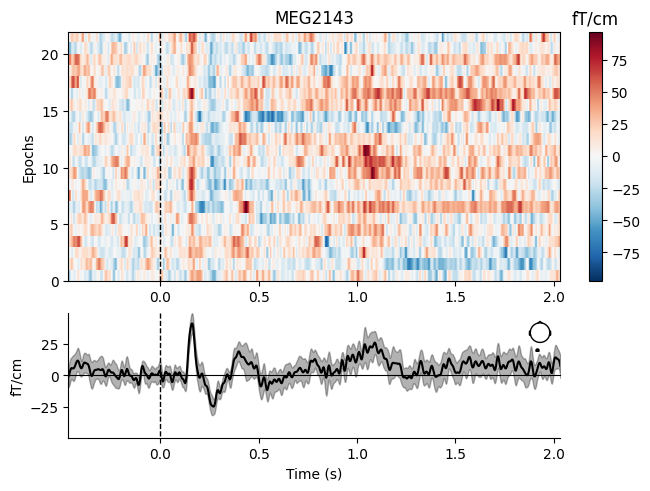

In [19]:
epochs['famous'].plot_image(picks='MEG2143');

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>Can you make the same plot for the other two conditions?</li>
      <li>Is there anything you notice?</li>   
    </ul>
</div>

## Average the epochs to get ERF/ERP 

Let's first crop the data to the -0.2 to 1 seconds interval, so we zoom in more on the experimental effect.

In [35]:
epochs.crop(-0.2, 1)

<EpochsFIF | 79 events (all good), -0.2 – 1 s (baseline -0.2 – 0 s), ~89.1 MiB, data loaded,
 'face/famous/first': 13
 'face/famous/immediate': 3
 'face/famous/long': 6
 'face/unfamiliar/first': 17
 'face/unfamiliar/immediate': 4
 'face/unfamiliar/long': 6
 'scrambled/first': 15
 'scrambled/immediate': 9
 'scrambled/long': 6>

In [36]:
evoked = epochs.average()  # average across epochs to create the evoked response

In [37]:
evoked

<Evoked | '0.16 × face/famous/first + 0.04 × face/famous/immediate + 0.08 × face/famous/long + 0.22 × face/unfamiliar/first + 0.05 × face/unfamiliar/immediate + 0.08 × face/unfamiliar/long + 0.19 × scrambled/first + 0.11 × scrambled/immediate + 0.08 × scrambled/long' (average, N=79), -0.2 – 1 s, baseline -0.2 – 0 s, 376 ch, ~7.9 MiB>

Let's look at our evoked field and evoked potential!

In [38]:
evoked.plot();

/tmp/ipykernel_1600542/75610611.py:1: RuntimeWarning: (X, Y) fit (3.3, 36.9) more than 20 mm from head frame origin
  evoked.plot();


## Separate the conditions

Let's look at the ERP at channel EEG065 for all three conditions.

In [39]:
# Remember how we can index the epochs:
evokeds = list()
for condition in ['famous', 'unfamiliar', 'scrambled']:
    evokeds.append(epochs[condition].average())

To more easily handle our evoked object, let's make a _list of evoked objects_ for the different conditions we are interested in. Then we can also make it easier for ourselved and compare the ERPs in one plot!

In [40]:
conditions = ['famous', 'unfamiliar', 'scrambled']
evokeds_list = []
for k, cond in enumerate(conditions):
    evoked = epochs[cond].average()
    evoked.comment = cond  # we want to update the name of the condition for plotting
    evokeds_list.append(evoked)

In [41]:
mne.viz.plot_compare_evokeds(evokeds_list, picks='EEG065');

/tmp/ipykernel_1600542/2854199228.py:1: RuntimeWarning: (X, Y) fit (3.3, 36.9) more than 20 mm from head frame origin
  mne.viz.plot_compare_evokeds(evokeds_list, picks='EEG065');


But what if we want to see _all_ channels?

In [42]:
%matplotlib qt
mne.viz.plot_compare_evokeds(evokeds_list, picks='meg', axes='topo');

/tmp/ipykernel_1600542/1730911171.py:2: RuntimeWarning: (X, Y) fit (3.3, 36.9) more than 20 mm from head frame origin
  mne.viz.plot_compare_evokeds(evokeds_list, picks='meg', axes='topo');


<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>Try clicking on the plot, what happens?</li>
      <li>Can you make the same plots for magnetometers and gradiometers?</li>
    </ul>
</div>


## Plot standard deviation across trials

It can be helpful to visualize evoked data with confidence intervals or standard deviations. Let's see how!

For standard deviations across _trials_, there is no ready-to-use MNE-Python function. The reason: Evoked objects do not store the information to compute this metric (i.e., single trials) anymore!

But don't worry: we can plot this ourselves using matplotlib - and gain some knowledge about matplotlib and writing functions on the way!

In [43]:
# Let's write our own function to compute the standard deviations!
# Since we have to use this operation for each condition, it's handy to write a function for it:

# Everything we need within the function, we have to pass to the function.
# In this case, we need the epochs object, and we want to pick this object for the right condition
# and for channels, so we also pass condition and picks.
def compute_sd(epochs, condition, picks):
    """ Get CI from epochs object for condition."""

    # this gets the data for the condition and channel as an array:
    epochs_data = epochs[condition].get_data(picks=picks)

    # compute the mean first
    epochs_mean = np.mean(epochs_data, axis=0)

    # compute the standard deviation
    epochs_std = np.std(epochs_data, axis=0)

    # add above and below the mean:
    sd_upper = np.squeeze(epochs_mean + epochs_std)
    sd_lower = np.squeeze(epochs_mean - epochs_std)

    # and return what we need
    return sd_lower, sd_upper    


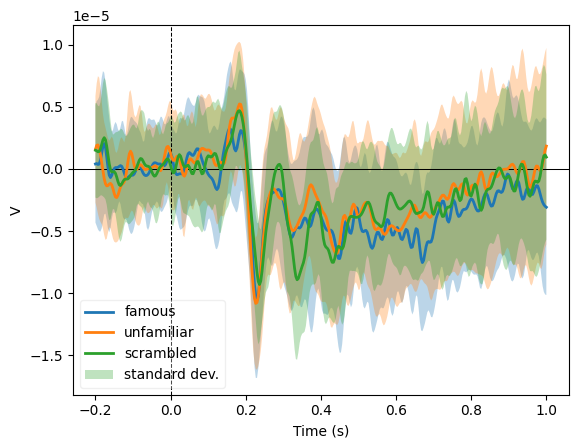

In [44]:
%matplotlib inline

picks = 'EEG065'  # we plot one channel

# let's first add the lines at zero that MNE-Python has
plt.axhline(y=0., color='black', linewidth=0.75)
plt.axvline(x=0., color='black', linewidth=0.75, linestyle='--')

for ii, condition in enumerate(conditions):

    # first let's compute the standard deviation with our function
    sd_lower, sd_upper = compute_sd(epochs, condition, picks)

    # get the evoked data from the evokeds list
    evoked_data = evokeds_list[ii].get_data(picks=picks)
    times = evokeds_list[ii].times

    # plot the evoked
    plt.plot(times, np.squeeze(evoked_data), linewidth=2, label=condition)

    # plot the standard deviation and add a label once
    plt.fill_between(times, sd_lower, sd_upper, alpha=0.3,
                     label=('standard dev.' if ii==2 else None))



# labels and legend 
plt.ylabel('V')  # note the difference in scaling to MNE-Python!
plt.xlabel('Time (s)')
plt.legend(loc='lower left', framealpha=0.3)

plt.show()


## Plot topographies

Next, we want to plot the topographies at the peak. We want to plot this for all channel types _and_ all conditions. To not wind up with 9 individual plots, let's see how to combine plots into one figure!

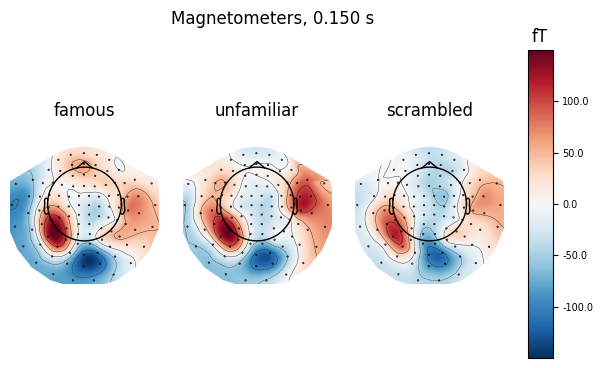

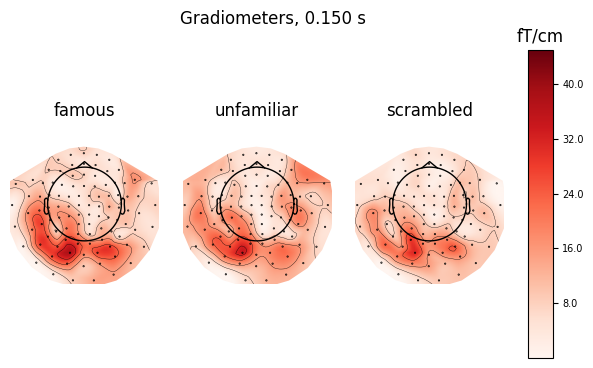

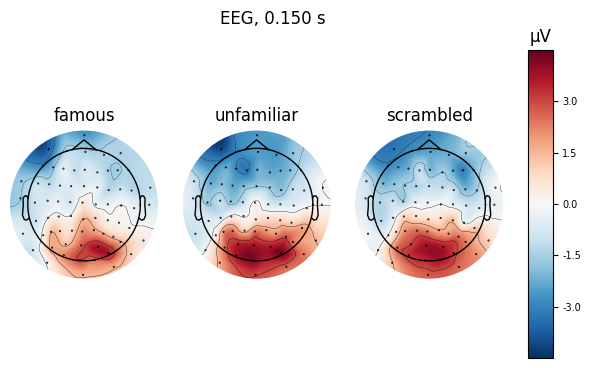

In [50]:
%matplotlib inline
# per channel type, we have different color limits for the topography:
color_lims = [(-150, 150), (0, 45), (-4.5, 4.5)]
channel_types = ['mag', 'grad', 'eeg']
sup_titles = ['Magnetometers', 'Gradiometers', 'EEG']

# For a good looking topomap in this data, we need to fit a sphere to the digitized EEG locations.
radius, center, _ = mne.bem.fit_sphere_to_headshape(epochs.info, dig_kinds="eeg")
sphere = tuple(center) + (radius,)

# we loop across the channel types first:
for ch_type, c_lim, s_title in zip(channel_types, color_lims, sup_titles):

    # Here we build our figure. Note that we ask for 4 subplots! That is because our colorbar
    # needs its own axis.
    fig, axes = plt.subplots(1, 4, figsize=(7, 4), gridspec_kw={'width_ratios': [3, 3, 3, 0.5]})

    # Now we can get the peak time across the conditions for this channel type.
    # We search for the peak time for up to 150 ms after stimulus onset. We will plot 
    # the topography for 100 ms around this peak - see the average parameter in the 
    # plotting function call!
    _, peak_time = evoked.get_peak(ch_type=ch_type, tmax=0.15)

    for ii, (ax, cond) in enumerate(zip(axes, conditions)):
        evokeds_list[ii].plot_topomap(
            ch_type=ch_type, times=peak_time, average=0.1,
            sphere=sphere,
            vlim=c_lim, 
            colorbar=(True if ii==2 else False),  # only one colorbar
            axes=(axes[2::] if ii == 2 else ax),  # last plot needs 2 axes
            show=False)

        ax.set_title(cond)

    fig.suptitle('%s, %.3f s' % (s_title, peak_time))

## Write evoked data to disk

In [51]:
 # note that the file for evoked ends with -ave.fif
evoked_fname = epochs_fname.replace('-epo.fif', '-ave.fif')
evoked_fname

'./ds000117_pruned/derivatives/meg_derivatives/sub-01/ses-meg/meg/sub-01_ses-meg_task-facerecognition_run-01_proc-sss-ave.fif'

In [52]:
evoked.save(evoked_fname, overwrite=True) 

You can also write multiple conditions into one file:

In [53]:
evoked_list_fname = evoked_fname.replace('-ave.fif', '_list-ave.fif')
mne.write_evokeds(evoked_list_fname, evokeds_list, overwrite=True)

### Reading evoked from disk

You can read the data back from the stored `.fif` file:

In [56]:
evokeds_list = mne.read_evokeds(evoked_fname)

Or give the explicit name of the averaged condition when reading in the list:

In [57]:
evoked_famous = mne.read_evokeds(evoked_list_fname, condition="famous")
evoked_famous

<Evoked | 'famous' (average, N=22), -0.2 – 1 s, baseline -0.2 – 0 s, 376 ch, ~7.9 MiB>

## Contrast the conditions

In [58]:
# now we can use the condition "face", which consists of famous and unfamiliar
evoked_face = epochs['face'].average()
evoked_scrambled = epochs['scrambled'].average()

# adapt the naming
evoked_face.comment = 'face'
evoked_scrambled.comment = 'scrambled'

In [63]:
contrast = mne.combine_evoked([evoked_face, evoked_scrambled], [0.5, -0.5])

contrast.comment = 'face - scrambled'

Note that this combines evokeds by taking into account the number of averaged epochs (to scale the noise variance). Let's check out the number of epochs we averaged over:

In [64]:
print(evoked_face.nave) 
print(evoked_scrambled.nave) 
print(contrast.nave) 

49
30
74.43037974683544


In [65]:
print(contrast)

<Evoked | 'face - scrambled' (average, N=74.43037974683544), -0.2 – 1 s, baseline -0.2 – 0 s, 376 ch, ~7.9 MiB>


Let's plot the contrast together with the ERPs:

/tmp/ipykernel_1600542/2766748675.py:1: RuntimeWarning: (X, Y) fit (3.3, 36.9) more than 20 mm from head frame origin
  mne.viz.plot_compare_evokeds([evoked_face, evoked_scrambled, contrast], picks='EEG065');


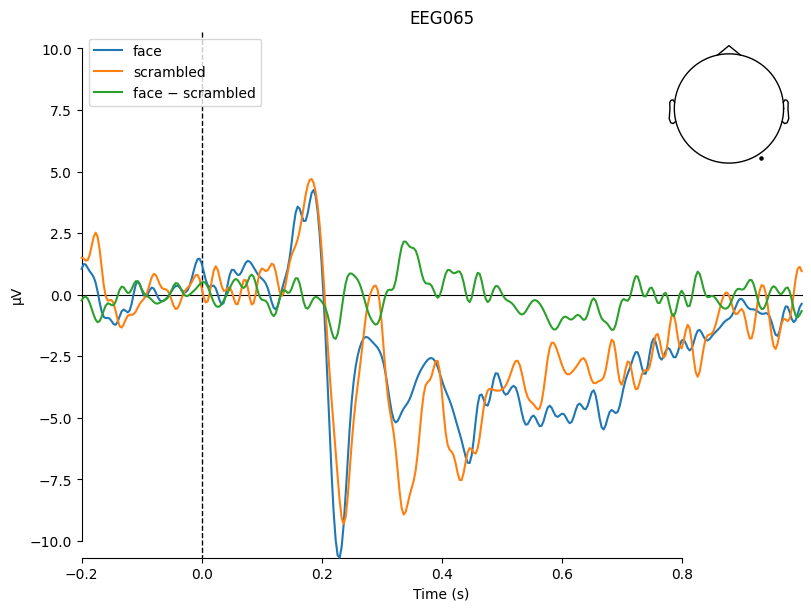

In [66]:
mne.viz.plot_compare_evokeds([evoked_face, evoked_scrambled, contrast], picks='EEG065');

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>Can you plot the difference between famous and unfamiliar faces for an occipital MEG sensor?</li>
    </ul>
</div>


## Plot a 3D field map

We can also plot the topography in 3D. Since MNE-Python also plots the head surface here, we need a `-trans.fif` file, that tells us the _transform_ between the MEG device coordinate system and the head surface coordinate system.

In [68]:
# get the path of the transform file
# usually, this needs to be created by manual coregistration, but we have it all ready!
extra_path = "./extra_data_mne/"
trans_fname = f"{extra_path}/source_recon/sub-01/sub-01-trans.fif"

# we also need the Freesurfer subjects direcory:
subjects_dir = f"{extra_path}/freesurfer"

In [73]:
# first make the map
maps = mne.make_field_map(evoked_face, trans=trans_fname, subject='sub-01', subjects_dir=subjects_dir)

# Plot it
%matplotlib qt
evoked_face.plot_field(maps, time=0.1)